In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('/Users/sharanmehta/Desktop/UIUC/FALL 2024/CS 412/project/Data/Database.sqlite')
tables = ['Country', 'League', 'Match', 'Player', 'Player_Attributes', 'Team', 'Team_Attributes']
dataframes = {table: pd.read_sql(f'SELECT * FROM {table}', conn) for table in tables}

def load_and_view_structure(conn):
    # Get all table names
    query = "SELECT name FROM sqlite_master WHERE type='table';"
    tables = pd.read_sql(query, conn)

    # Display the structure of each table
    table_structure = {}
    for table in tables['name']:
        query = f"PRAGMA table_info({table});"
        structure = pd.read_sql(query, conn)
        table_structure[table] = structure

    return tables, table_structure

# Call the function
tables, table_structure = load_and_view_structure(conn)

# View the table names and structure
print(tables)
for table, structure in table_structure.items():
    print(f"Table: {table}")
    print(structure)

                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes
Table: sqlite_sequence
   cid  name type  notnull dflt_value  pk
0    0  name             0       None   0
1    1   seq             0       None   0
Table: Player_Attributes
    cid                 name     type  notnull dflt_value  pk
0     0                   id  INTEGER        0       None   1
1     1   player_fifa_api_id  INTEGER        0       None   0
2     2        player_api_id  INTEGER        0       None   0
3     3                 date     TEXT        0       None   0
4     4       overall_rating  INTEGER        0       None   0
5     5            potential  INTEGER        0       None   0
6     6       preferred_foot     TEXT        0       None   0
7     7  attacking_work_rate     TEXT        0       None   0
8     8  defensive_work_rate     TEXT        0       None   0
9     9          

In [2]:
def load_match_table(conn):
    # Load the entire Match table
    query = "SELECT * FROM Match;"
    match_df = pd.read_sql(query, conn)
    print(f"Match table loaded. Shape: {match_df.shape}")
    return match_df

def split_match_table(match_df):
    # Get the last 30 columns as betting features
    betting_columns = match_df.columns[-30:].tolist()

    # Create two new DataFrames: one for non-betting and one for betting features
    non_betting_df = match_df.drop(columns=betting_columns, errors='ignore')
    betting_df = match_df[betting_columns]
    
    print(f"Non-Betting Features DataFrame Shape: {non_betting_df.shape}")
    print(f"Betting Features DataFrame Shape: {betting_df.shape}")

    return non_betting_df, betting_df

match_df = load_match_table(conn)
print("Match Data")
match_df.head()
match_df.info()
match_df.describe()
non_betting_df, betting_df = split_match_table(match_df)
print("Non Betting Data")
non_betting_df.head()
non_betting_df.info()
non_betting_df.describe()
print("Betting Data")
betting_df.head()
betting_df.info()
betting_df.describe()

Match table loaded. Shape: (25979, 115)
Match Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
Non-Betting Features DataFrame Shape: (25979, 85)
Betting Features DataFrame Shape: (25979, 30)
Non Betting Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 85 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25979 non-null  int64  
 1   country_id        25979 non-null  int64  
 2   league_id         25979 non-null  int64  
 3   season            25979 non-null  object 
 4   stage             25979 non-null  int64  
 5   date              25979 non-null  object 
 6   match_api_id      25979 non-null  int64  
 7   home_team_api_id  25979 non-null  int64  
 8   away_team_api_id  25979 non-null  int64  
 9   home_team_goal    25979 non-null

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,22592.000000,22592.000000,22592.000000,22575.000000,22575.000000,22575.000000,22520.000000,22520.000000,22520.000000,22556.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,2.628818,3.839684,4.662222,2.559245,3.747597,4.396949,2.467613,3.608932,4.150575,2.536202,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,1.794463,1.118269,3.730104,1.637983,1.033468,3.292265,1.445642,0.803582,2.858912,1.640648,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.040000,1.400000,1.080000,1.030000,1.650000,1.100000,1.030000,1.500000,1.100000,1.040000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,1.670000,3.300000,2.500000,1.650000,3.200000,2.500000,1.650000,3.200000,2.500000,1.670000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,2.100000,3.500000,3.500000,2.100000,3.400000,3.400000,2.100000,3.300000,3.300000,2.100000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,2.800000,4.000000,5.250000,2.750000,3.800000,5.000000,2.600000,3.700000,4.600000,2.700000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,26.000000,17.000000,51.000000,34.000000,19.500000,51.000000,20.000000,11.000000,25.000000,26.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [3]:
def filter_leagues(conn, league_ids):
    # SQL query to filter the Match table for the selected leagues
    query = f"SELECT * FROM Match WHERE league_id IN ({', '.join(map(str, league_ids))});"
    
    # Load the filtered data into a DataFrame
    filtered_match_df = pd.read_sql(query, conn)
    
    print(f"Filtered Match table loaded. Shape: {filtered_match_df.shape}")
    return filtered_match_df

# Define the league IDs to filter
league_ids = [1729, 4769, 7809, 10257, 19694, 21518]

# Apply the filter function to get only the relevant leagues
filtered_match_df = filter_leagues(conn, league_ids)

# Display the result
filtered_match_df.head()
filtered_match_df.info()

Filtered Match table loaded. Shape: (16409, 115)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16409 entries, 0 to 16408
Columns: 115 entries, id to BSA
dtypes: float64(54), int64(51), object(10)
memory usage: 14.4+ MB


In [4]:
filtered_non_betting_df, filtered_betting_df = split_match_table(filtered_match_df)
print("Non Betting Data")
filtered_non_betting_df.head()
filtered_non_betting_df.info()
filtered_non_betting_df.describe()
print("Betting Data")
filtered_betting_df.head()
filtered_betting_df.info()
filtered_betting_df.describe()

Non-Betting Features DataFrame Shape: (16409, 85)
Betting Features DataFrame Shape: (16409, 30)
Non Betting Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16409 entries, 0 to 16408
Data columns (total 85 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                16409 non-null  int64  
 1   country_id        16409 non-null  int64  
 2   league_id         16409 non-null  int64  
 3   season            16409 non-null  object 
 4   stage             16409 non-null  int64  
 5   date              16409 non-null  object 
 6   match_api_id      16409 non-null  int64  
 7   home_team_api_id  16409 non-null  int64  
 8   away_team_api_id  16409 non-null  int64  
 9   home_team_goal    16409 non-null  int64  
 10  away_team_goal    16409 non-null  int64  
 11  home_player_X1    16409 non-null  int64  
 12  home_player_X2    16409 non-null  int64  
 13  home_player_X3    16409 non-null  int64  
 14  home_player_X4    164

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,16397.000000,16397.000000,16397.000000,16382.000000,16382.000000,16382.000000,16359.000000,16359.000000,16359.000000,16390.000000,...,12476.000000,16378.000000,16378.000000,16378.000000,10221.000000,10221.00000,10221.000000,10225.000000,10225.000000,10225.00000
mean,2.618398,3.810660,4.645536,2.552812,3.731593,4.383497,2.468371,3.611526,4.143188,2.540563,...,4.604683,2.667045,3.872863,4.838575,2.492012,3.62406,4.335759,2.492891,3.634681,4.39299
std,1.772645,1.145618,3.745670,1.625107,1.064829,3.292423,1.439640,0.820249,2.844410,1.636125,...,3.644142,1.926711,1.289781,4.375626,1.475172,0.87003,2.970306,1.495383,0.863248,3.16532
min,1.040000,1.400000,1.080000,1.030000,1.650000,1.100000,1.050000,1.500000,1.100000,1.040000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.45000,1.120000,1.040000,1.330000,1.12000
25%,1.720000,3.250000,2.600000,1.700000,3.200000,2.550000,1.700000,3.200000,2.550000,1.700000,...,2.615000,1.730000,3.250000,2.600000,1.700000,3.20000,2.600000,1.700000,3.250000,2.62000
50%,2.100000,3.400000,3.500000,2.100000,3.400000,3.400000,2.100000,3.300000,3.300000,2.100000,...,3.500000,2.150000,3.500000,3.600000,2.100000,3.30000,3.400000,2.100000,3.300000,3.40000
75%,2.750000,3.800000,5.000000,2.700000,3.800000,5.000000,2.600000,3.675000,4.600000,2.700000,...,5.000000,2.800000,4.000000,5.250000,2.600000,3.70000,5.000000,2.620000,3.750000,5.00000
max,26.000000,17.000000,51.000000,34.000000,19.500000,51.000000,20.000000,11.000000,25.000000,26.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.00000,34.000000,17.000000,13.000000,34.00000


In [5]:
def list_missing_values(df):
    # Calculate the number of missing values per feature
    missing_values = df.isnull().sum()
    
    # Create a DataFrame for better readability
    missing_df = pd.DataFrame({
        'Feature': missing_values.index,
        'Missing Values': missing_values.values,
        'Percentage Missing': (missing_values.values / len(df)) * 100
    }).sort_values(by='Missing Values', ascending=False)
    
    # Filter out features with no missing values and print the results
    missing_df = missing_df[missing_df['Missing Values'] > 0]
    
    if missing_df.empty:
        print("No missing values.")
    else:
        print(missing_df)

list_missing_values(filtered_non_betting_df)
list_missing_values(filtered_betting_df)

            Feature  Missing Values  Percentage Missing
84       possession            2829           17.240539
77             goal            2829           17.240539
83           corner            2829           17.240539
82            cross            2829           17.240539
81             card            2829           17.240539
80       foulcommit            2829           17.240539
79          shotoff            2829           17.240539
78           shoton            2829           17.240539
64   home_player_10              85            0.518008
76   away_player_11              84            0.511914
75   away_player_10              82            0.499726
65   home_player_11              74            0.450972
56    home_player_2              70            0.426595
67    away_player_2              70            0.426595
68    away_player_3              67            0.408313
73    away_player_8              66            0.402218
74    away_player_9              64            0

In [6]:
def missing_values_report(df):
    # Calculate the total number of missing values for each feature
    missing_values = df.isnull().sum()
    total_rows = len(df)

    # Features with missing values
    missing_features = missing_values[missing_values > 0].sort_values(ascending=False)
    missing_features_df = pd.DataFrame({
        'Feature': missing_features.index,
        'Missing Values': missing_features.values,
        'Percentage Missing': (missing_features.values / total_rows) * 100
    })

    # Features with no missing values
    no_missing_features = missing_values[missing_values == 0]
    no_missing_features_df = pd.DataFrame({
        'Feature': no_missing_features.index,
        'Missing Values': no_missing_features.values,
        'Percentage Missing': (no_missing_features.values / total_rows) * 100
    })

    # Print summary of features with and without missing values
    print("Features with Missing Values:")
    print(missing_features_df)
    print("\nFeatures with No Missing Values:")
    print(no_missing_features_df)

    return missing_features_df, no_missing_features_df

missing_values_report(filtered_non_betting_df)
missing_values_report(filtered_betting_df)

Features with Missing Values:
            Feature  Missing Values  Percentage Missing
0        possession            2829           17.240539
1              card            2829           17.240539
2              goal            2829           17.240539
3           shotoff            2829           17.240539
4        foulcommit            2829           17.240539
5            shoton            2829           17.240539
6             cross            2829           17.240539
7            corner            2829           17.240539
8    home_player_10              85            0.518008
9    away_player_11              84            0.511914
10   away_player_10              82            0.499726
11   home_player_11              74            0.450972
12    home_player_2              70            0.426595
13    away_player_2              70            0.426595
14    away_player_3              67            0.408313
15    away_player_8              66            0.402218
16    away_player_

(   Feature  Missing Values  Percentage Missing
 0      PSH            8219           50.088366
 1      PSA            8219           50.088366
 2      PSD            8219           50.088366
 3      GBH            6188           37.711012
 4      GBD            6188           37.711012
 5      GBA            6188           37.711012
 6      BSH            6184           37.686635
 7      BSA            6184           37.686635
 8      BSD            6184           37.686635
 9      SJH            3933           23.968554
 10     SJD            3933           23.968554
 11     SJA            3933           23.968554
 12     IWA              50            0.304711
 13     IWD              50            0.304711
 14     IWH              50            0.304711
 15     VCH              31            0.188921
 16     VCD              31            0.188921
 17     VCA              31            0.188921
 18     BWA              27            0.164544
 19     BWD              27            0

a summary of the missing data across both the non-betting and betting datasets:

Non-Betting Features:
Significant missing values (~17.2% missing data) are observed in key event-related features such as:
Possession
Goal
Corner
Cross
Card
Shotoff
Foulcommit
cross

Player-related features show minimal missing values (around 0.5% or less), mostly affecting player positions:
- Away and home player positions (X and Y coordinates) have missing data for a small percentage of the dataset.
- Individual players such as home_player_10, away_player_11, and others show very slight gaps (~0.3-0.5%).

Betting Features:
- The PSH, PSA, PSD (Pinnacle odds) columns have the highest missing data (~50% missing), indicating a large gap in these odds data.
- GBH, GBD, GBA (Betting odds from GameBookers) and BSH, BSA, BSD (Betsson odds) columns have about 37.7% missing values, showing moderate gaps.
- SJH, SJD, SJA (Stan James odds) have approximately 24% missing values.
- For other betting columns like IWH, IWA, IWD (Interwetten odds) and BWH, BWD, BWA (Bet & Win odds), the missing data is minimal, ranging around 0.3%.
- Odds from VCH, VCD, VCA (VCBet) and WHH, WHD, WHA (William Hill) are almost fully populated, with less than 0.2% missing values.

Key Insights:
- Match event data (e.g., possession, goals, and player positions) has some notable gaps, but not severe enough to render the dataset unusable.
- Betting data for some columns is quite incomplete, especially for Pinnacle odds and GameBookers odds, which have a significant amount of missing data (up to 50%).


In [7]:
def analyze_missing_data_correlation(df, columns_to_check):
    # Filter rows where any of the key event-related columns have missing values
    missing_data_df = df[df[columns_to_check].isnull().any(axis=1)]
    
    # Analyze the distribution of leagues and seasons in the missing data
    league_distribution = missing_data_df['league_id'].value_counts(normalize=True) * 100
    season_distribution = missing_data_df['season'].value_counts(normalize=True) * 100

    # Also get league and season distribution in the full dataset for comparison
    overall_league_distribution = df['league_id'].value_counts(normalize=True) * 100
    overall_season_distribution = df['season'].value_counts(normalize=True) * 100

    print("League Distribution in Missing Data:")
    print(league_distribution)
    print("\nOverall League Distribution:")
    print(overall_league_distribution)
    
    print("\nSeason Distribution in Missing Data:")
    print(season_distribution)
    print("\nOverall Season Distribution:")
    print(overall_season_distribution)


In [8]:
import pandas as pd

# Define file paths
base_path = '/Users/sharanmehta/Desktop/UIUC/FALL 2024/CS 412/project/Data/matchdata'
file_paths = {
    'possession_detail': f'{base_path}/possession_detail.csv',
    'goal_detail': f'{base_path}/goal_detail.csv',
    'shotoff_detail': f'{base_path}/shotoff_detail.csv',
    'shoton_detail': f'{base_path}/shoton_detail.csv',
    'corner_detail': f'{base_path}/corner_detail.csv',
    'cross_detail': f'{base_path}/cross_detail.csv',
    'foulcommit_detail': f'{base_path}/foulcommit_detail.csv',
    'card_detail': f'{base_path}/card_detail.csv'
}

# Define columns to keep for each file
columns_to_keep = {
    'possession_detail': ['match_id','homepos', 'awaypos', 'elapsed'],
    'goal_detail': ['match_id', 'player1', 'player2', 'team', 'comment'],
    'shotoff_detail': ['match_id', 'player1', 'team'],
    'shoton_detail': ['match_id', 'player1', 'team'],
    'corner_detail': ['match_id', 'player1', 'team', 'subtype'],
    'cross_detail': ['match_id', 'player1', 'team'],
    'foulcommit_detail': ['match_id', 'player1', 'player2', 'team'],
    'card_detail': ['match_id','card_type', 'player1', 'team']
}

# Process each file and create match_facts_df
match_facts_data = []
for key, file_path in file_paths.items():
    # Load the file
    df = pd.read_csv(file_path, low_memory=False)
    
    # Filter to only the specified columns
    df_filtered = df[columns_to_keep[key]]
    
    # Add a prefix to distinguish columns in merged DataFrame
    df_filtered = df_filtered.add_prefix(f"{key}_")
    
    # Append to list for concatenation
    match_facts_data.append(df_filtered)

# Concatenate all feature-specific data into match_facts_df
match_facts_df = pd.concat(match_facts_data, axis=1)

list_missing_values(match_facts_df)

                       Feature  Missing Values  Percentage Missing
6          goal_detail_player2          267706           94.006145
1    possession_detail_homepos          249979           87.781231
2    possession_detail_awaypos          249979           87.781231
0   possession_detail_match_id          249960           87.774559
3    possession_detail_elapsed          249960           87.774559
5          goal_detail_player1          244912           86.001931
7             goal_detail_team          244829           85.972786
4         goal_detail_match_id          244795           85.960846
8          goal_detail_comment          244795           85.960846
27       card_detail_card_type          223266           78.400843
28         card_detail_player1          222981           78.300764
29            card_detail_team          222981           78.300764
26        card_detail_match_id          222661           78.188394
16       corner_detail_player1          199399           70.01

In [9]:
missing_features_df, _ = missing_values_report(match_facts_df)

Features with Missing Values:
                       Feature  Missing Values  Percentage Missing
0          goal_detail_player2          267706           94.006145
1    possession_detail_homepos          249979           87.781231
2    possession_detail_awaypos          249979           87.781231
3   possession_detail_match_id          249960           87.774559
4    possession_detail_elapsed          249960           87.774559
5          goal_detail_player1          244912           86.001931
6             goal_detail_team          244829           85.972786
7         goal_detail_match_id          244795           85.960846
8          goal_detail_comment          244795           85.960846
9        card_detail_card_type          223266           78.400843
10         card_detail_player1          222981           78.300764
11            card_detail_team          222981           78.300764
12        card_detail_match_id          222661           78.188394
13       corner_detail_player1  

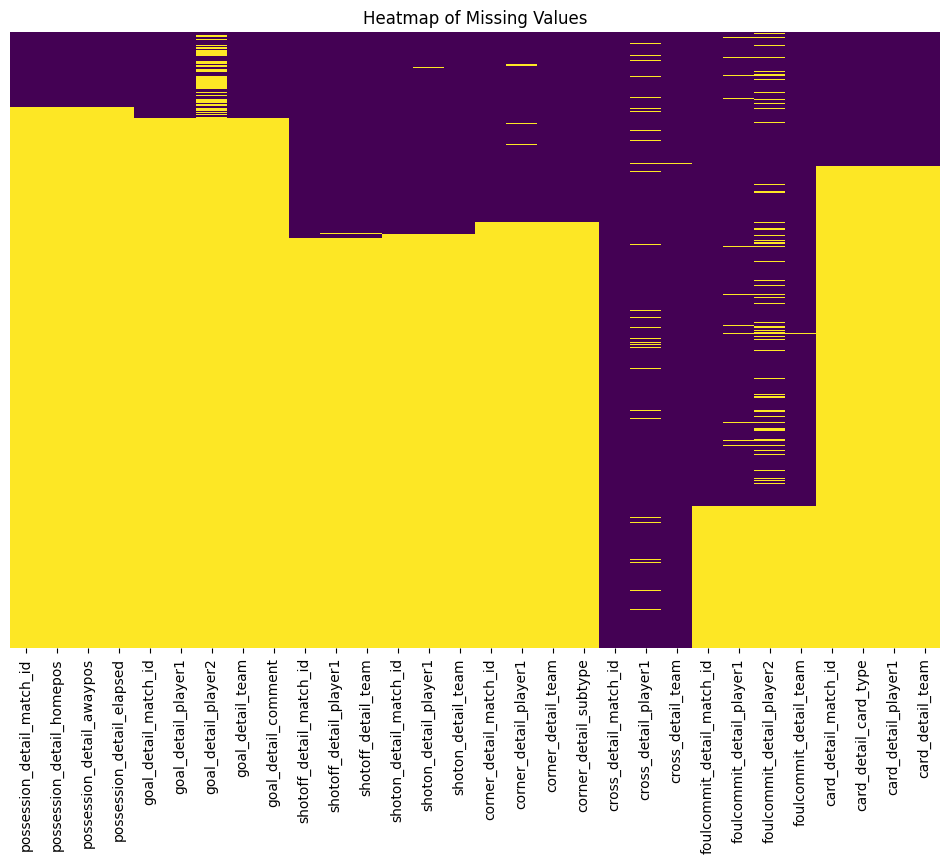

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_missing_values_heatmap(df, title="Heatmap of Missing Values"):
    """
    Plots a heatmap for visualizing missing values in any DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame to visualize.
    - title (str): Title for the heatmap plot.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
    plt.title(title)
    plt.show()

plot_missing_values_heatmap(match_facts_df)

In [11]:
# Feature engineering for corners

# Step 1: Create corner_summary_df with match metadata
corner_summary_df = filtered_non_betting_df[['id', 'league_id', 'season', 'date', 'home_team_api_id', 'away_team_api_id']].copy()

# Step 2: Compute corner counts using groupby and merge
# Create a DataFrame counting corners per team per match
corner_counts = match_facts_df.groupby(['corner_detail_match_id', 'corner_detail_team']).size().reset_index(name='corner_count')

# Step 3: Merge corner_counts with corner_summary_df for home and away teams
# Merge for home team corners
corner_summary_df = corner_summary_df.merge(
    corner_counts,
    left_on=['id', 'home_team_api_id'],
    right_on=['corner_detail_match_id', 'corner_detail_team'],
    how='left'
).rename(columns={'corner_count': 'total_corners_home'}).drop(columns=['corner_detail_match_id', 'corner_detail_team'])

# Merge for away team corners
corner_summary_df = corner_summary_df.merge(
    corner_counts,
    left_on=['id', 'away_team_api_id'],
    right_on=['corner_detail_match_id', 'corner_detail_team'],
    how='left'
).rename(columns={'corner_count': 'total_corners_away'}).drop(columns=['corner_detail_match_id', 'corner_detail_team'])

# Step 4: Fill NaNs with 0
corner_summary_df['total_corners_home'] = corner_summary_df['total_corners_home'].fillna(0).astype(int)
corner_summary_df['total_corners_away'] = corner_summary_df['total_corners_away'].fillna(0).astype(int)

# Step 5: Calculate the total corners for each match
corner_summary_df['total_corners'] = corner_summary_df['total_corners_home'] + corner_summary_df['total_corners_away']

# Step 6: Flag missing data
corner_summary_df['missing_data_flag'] = ((corner_summary_df['total_corners_home'] == 0) & (corner_summary_df['total_corners_away'] == 0)).astype(int)

# Display the processed data
print(corner_summary_df[['id', 'total_corners_home', 'total_corners_away', 'total_corners', 'missing_data_flag']].head())


     id  total_corners_home  total_corners_away  total_corners  \
0  1729                   6                   6             12   
1  1730                   7                   5             12   
2  1731                   1                   8              9   
3  1732                   6                  10             16   
4  1733                   7                   8             15   

   missing_data_flag  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


In [12]:
# Feature engineering for shoton

# Step 1: Create shoton_summary_df with match metadata
shoton_summary_df = filtered_non_betting_df[['id', 'league_id', 'season', 'date', 'home_team_api_id', 'away_team_api_id']].copy()

# Step 2: Compute shoton counts using groupby and merge
# Create a DataFrame counting shotons per team per match
shoton_counts = match_facts_df.groupby(['shoton_detail_match_id', 'shoton_detail_team']).size().reset_index(name='shoton_count')

# Step 3: Merge shoton_counts with shoton_summary_df for home and away teams
# Merge for home team shotons
shoton_summary_df = shoton_summary_df.merge(
    shoton_counts,
    left_on=['id', 'home_team_api_id'],
    right_on=['shoton_detail_match_id', 'shoton_detail_team'],
    how='left'
).rename(columns={'shoton_count': 'total_shotons_home'}).drop(columns=['shoton_detail_match_id', 'shoton_detail_team'])

# Merge for away team shotons
shoton_summary_df = shoton_summary_df.merge(
    shoton_counts,
    left_on=['id', 'away_team_api_id'],
    right_on=['shoton_detail_match_id', 'shoton_detail_team'],
    how='left'
).rename(columns={'shoton_count': 'total_shotons_away'}).drop(columns=['shoton_detail_match_id', 'shoton_detail_team'])

# Step 4: Fill NaNs with 0
shoton_summary_df['total_shotons_home'] = shoton_summary_df['total_shotons_home'].fillna(0).astype(int)
shoton_summary_df['total_shotons_away'] = shoton_summary_df['total_shotons_away'].fillna(0).astype(int)

# Step 5: Calculate the total shotons for each match
shoton_summary_df['total_shotons'] = shoton_summary_df['total_shotons_home'] + shoton_summary_df['total_shotons_away']

# Step 6: Flag missing data
shoton_summary_df['missing_data_flag'] = ((shoton_summary_df['total_shotons_home'] == 0) & (shoton_summary_df['total_shotons_away'] == 0)).astype(int)

# Display the processed data
print(shoton_summary_df[['id', 'total_shotons_home', 'total_shotons_away', 'total_shotons', 'missing_data_flag']].head())



     id  total_shotons_home  total_shotons_away  total_shotons  \
0  1729                  11                   1             12   
1  1730                  12                   2             14   
2  1731                   4                  11             15   
3  1732                   5                   7             12   
4  1733                   5                   9             14   

   missing_data_flag  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


In [13]:
# Feature engineering for shotoff

# Step 1: Create shotoff_summary_df with match metadata
shotoff_summary_df = filtered_non_betting_df[['id', 'league_id', 'season', 'date', 'home_team_api_id', 'away_team_api_id']].copy()

# Step 2: Compute shotoff counts using groupby and merge
# Create a DataFrame counting shotoffs per team per match
shotoff_counts = match_facts_df.groupby(['shotoff_detail_match_id', 'shotoff_detail_team']).size().reset_index(name='shotoff_count')

# Step 3: Merge shotoff_counts with shotoff_summary_df for home and away teams
# Merge for home team shotoffs
shotoff_summary_df = shotoff_summary_df.merge(
    shotoff_counts,
    left_on=['id', 'home_team_api_id'],
    right_on=['shotoff_detail_match_id', 'shotoff_detail_team'],
    how='left'
).rename(columns={'shotoff_count': 'total_shotoffs_home'}).drop(columns=['shotoff_detail_match_id', 'shotoff_detail_team'])

# Merge for away team shotoffs
shotoff_summary_df = shotoff_summary_df.merge(
    shotoff_counts,
    left_on=['id', 'away_team_api_id'],
    right_on=['shotoff_detail_match_id', 'shotoff_detail_team'],
    how='left'
).rename(columns={'shotoff_count': 'total_shotoffs_away'}).drop(columns=['shotoff_detail_match_id', 'shotoff_detail_team'])

# Step 4: Fill NaNs with 0
shotoff_summary_df['total_shotoffs_home'] = shotoff_summary_df['total_shotoffs_home'].fillna(0).astype(int)
shotoff_summary_df['total_shotoffs_away'] = shotoff_summary_df['total_shotoffs_away'].fillna(0).astype(int)

# Step 5: Calculate the total shotoffs for each match
shotoff_summary_df['total_shotoffs'] = shotoff_summary_df['total_shotoffs_home'] + shotoff_summary_df['total_shotoffs_away']

# Step 6: Flag missing data
shotoff_summary_df['missing_data_flag'] = ((shotoff_summary_df['total_shotoffs_home'] == 0) & (shotoff_summary_df['total_shotoffs_away'] == 0)).astype(int)

# Display the processed data
print(shotoff_summary_df[['id', 'total_shotoffs_home', 'total_shotoffs_away', 'total_shotoffs', 'missing_data_flag']].head())

     id  total_shotoffs_home  total_shotoffs_away  total_shotoffs  \
0  1729                   10                    9              19   
1  1730                   13                    3              16   
2  1731                    3                    5               8   
3  1732                    7                   15              22   
4  1733                    4                    5               9   

   missing_data_flag  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


In [14]:
# Feature enginering for cross

# Step 1: Create cross_summary_df with match metadata
cross_summary_df = filtered_non_betting_df[['id', 'league_id', 'season', 'date', 'home_team_api_id', 'away_team_api_id']].copy()

# Step 2: Compute cross counts using groupby and merge
# Create a DataFrame counting crosses per team per match
cross_counts = match_facts_df.groupby(['cross_detail_match_id', 'cross_detail_team']).size().reset_index(name='cross_count')

# Step 3: Merge cross_counts with cross_summary_df for home and away teams
# Merge for home team crosses
cross_summary_df = cross_summary_df.merge(
    cross_counts,
    left_on=['id', 'home_team_api_id'],
    right_on=['cross_detail_match_id', 'cross_detail_team'],
    how='left'
).rename(columns={'cross_count': 'total_cross_home'}).drop(columns=['cross_detail_match_id', 'cross_detail_team'])

# Merge for away team crosses
cross_summary_df = cross_summary_df.merge(
    cross_counts,
    left_on=['id', 'away_team_api_id'],
    right_on=['cross_detail_match_id', 'cross_detail_team'],
    how='left'
).rename(columns={'cross_count': 'total_cross_away'}).drop(columns=['cross_detail_match_id', 'cross_detail_team'])

# Step 4: Fill NaNs with 0
cross_summary_df['total_cross_home'] = cross_summary_df['total_cross_home'].fillna(0).astype(int)
cross_summary_df['total_cross_away'] = cross_summary_df['total_cross_away'].fillna(0).astype(int)

# Step 5: Calculate the total crosses for each match
cross_summary_df['total_cross'] = cross_summary_df['total_cross_home'] + cross_summary_df['total_cross_away']

# Step 6: Flag missing data
cross_summary_df['missing_data_flag'] = ((cross_summary_df['total_cross_home'] == 0) & (cross_summary_df['total_cross_away'] == 0)).astype(int)

# Display the processed data
print(cross_summary_df[['id', 'total_cross_home', 'total_cross_away', 'total_cross', 'missing_data_flag']].head())


     id  total_cross_home  total_cross_away  total_cross  missing_data_flag
0  1729                24                 9           33                  0
1  1730                21                 7           28                  0
2  1731                15                19           34                  0
3  1732                15                27           42                  0
4  1733                16                16           32                  0


In [15]:
# Feature engineering for foulcommit

# Step 1: Create foulcommit_summary_df with match metadata
foulcommit_summary_df = filtered_non_betting_df[['id', 'league_id', 'season', 'date', 'home_team_api_id', 'away_team_api_id']].copy()

# Step 2: Compute foulcommit counts using groupby and merge
# Create a DataFrame counting fouls per team per match
foulcommit_counts = match_facts_df.groupby(['foulcommit_detail_match_id', 'foulcommit_detail_team']).size().reset_index(name='foulcommit_count')

# Step 3: Merge foulcommit_counts with foulcommit_summary_df for home and away teams
# Merge for home team fouls
foulcommit_summary_df = foulcommit_summary_df.merge(
    foulcommit_counts,
    left_on=['id', 'home_team_api_id'],
    right_on=['foulcommit_detail_match_id', 'foulcommit_detail_team'],
    how='left'
).rename(columns={'foulcommit_count': 'total_foulcommits_home'}).drop(columns=['foulcommit_detail_match_id', 'foulcommit_detail_team'])

# Merge for away team fouls
foulcommit_summary_df = foulcommit_summary_df.merge(
    foulcommit_counts,
    left_on=['id', 'away_team_api_id'],
    right_on=['foulcommit_detail_match_id', 'foulcommit_detail_team'],
    how='left'
).rename(columns={'foulcommit_count': 'total_foulcommits_away'}).drop(columns=['foulcommit_detail_match_id', 'foulcommit_detail_team'])

# Step 4: Fill NaNs with 0
foulcommit_summary_df['total_foulcommits_home'] = foulcommit_summary_df['total_foulcommits_home'].fillna(0).astype(int)
foulcommit_summary_df['total_foulcommits_away'] = foulcommit_summary_df['total_foulcommits_away'].fillna(0).astype(int)

# Step 5: Calculate the total foulcommits for each match
foulcommit_summary_df['total_foulcommits'] = foulcommit_summary_df['total_foulcommits_home'] + foulcommit_summary_df['total_foulcommits_away']

# Step 6: Flag missing data
foulcommit_summary_df['missing_data_flag'] = ((foulcommit_summary_df['total_foulcommits_home'] == 0) & (foulcommit_summary_df['total_foulcommits_away'] == 0)).astype(int)

# Display the processed data
print(foulcommit_summary_df[['id', 'total_foulcommits_home', 'total_foulcommits_away', 'total_foulcommits', 'missing_data_flag']].head())


     id  total_foulcommits_home  total_foulcommits_away  total_foulcommits  \
0  1729                      16                      11                 27   
1  1730                      11                       9                 20   
2  1731                      13                      12                 25   
3  1732                      14                      13                 27   
4  1733                      11                      13                 24   

   missing_data_flag  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  


In [16]:
# Feature engineering for cards

# Step 1: Create card_summary_df with match metadata
card_summary_df = filtered_non_betting_df[['id', 'league_id', 'season', 'date', 'home_team_api_id', 'away_team_api_id']].copy()

# Step 2: Count yellow and red cards using groupby
card_counts = (
    match_facts_df
    .groupby(['card_detail_match_id', 'card_detail_team', 'card_detail_card_type'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={'r': 'red_cards', 'y': 'yellow_cards'})
    .reset_index()
)

# Ensure columns are present
if 'yellow_cards' not in card_counts.columns:
    card_counts['yellow_cards'] = 0
if 'red_cards' not in card_counts.columns:
    card_counts['red_cards'] = 0

# Step 3: Merge card counts with card_summary_df for home and away teams
# Merge for home team
card_summary_df = card_summary_df.merge(
    card_counts[['card_detail_match_id', 'card_detail_team', 'yellow_cards', 'red_cards']],
    left_on=['id', 'home_team_api_id'],
    right_on=['card_detail_match_id', 'card_detail_team'],
    how='left'
).rename(columns={'yellow_cards': 'yellow_cards_home', 'red_cards': 'red_cards_home'}).drop(columns=['card_detail_match_id', 'card_detail_team'])

# Merge for away team
card_summary_df = card_summary_df.merge(
    card_counts[['card_detail_match_id', 'card_detail_team', 'yellow_cards', 'red_cards']],
    left_on=['id', 'away_team_api_id'],
    right_on=['card_detail_match_id', 'card_detail_team'],
    how='left'
).rename(columns={'yellow_cards': 'yellow_cards_away', 'red_cards': 'red_cards_away'}).drop(columns=['card_detail_match_id', 'card_detail_team'])

# Step 4: Fill NaNs with 0 for consistency
card_summary_df['yellow_cards_home'] = card_summary_df['yellow_cards_home'].fillna(0).astype(int)
card_summary_df['yellow_cards_away'] = card_summary_df['yellow_cards_away'].fillna(0).astype(int)
card_summary_df['red_cards_home'] = card_summary_df['red_cards_home'].fillna(0).astype(int)
card_summary_df['red_cards_away'] = card_summary_df['red_cards_away'].fillna(0).astype(int)

# Step 5: Calculate total yellow and red cards for each match
card_summary_df['total_yellow_cards'] = card_summary_df['yellow_cards_home'] + card_summary_df['yellow_cards_away']
card_summary_df['total_red_cards'] = card_summary_df['red_cards_home'] + card_summary_df['red_cards_away']

# Step 6: Flag missing data
card_summary_df['missing_data_flag'] = ((card_summary_df['yellow_cards_home'] == 0) & 
                                        (card_summary_df['yellow_cards_away'] == 0) &
                                        (card_summary_df['red_cards_home'] == 0) & 
                                        (card_summary_df['red_cards_away'] == 0)).astype(int)

# Display the processed data
print(card_summary_df[['id', 'yellow_cards_home', 'red_cards_home', 'yellow_cards_away', 'red_cards_away', 'total_yellow_cards', 'total_red_cards', 'missing_data_flag']].head())


     id  yellow_cards_home  red_cards_home  yellow_cards_away  red_cards_away  \
0  1729                  3               0                  0               0   
1  1730                  0               0                  0               0   
2  1731                  0               0                  2               0   
3  1732                  2               0                  1               0   
4  1733                  0               0                  1               0   

   total_yellow_cards  total_red_cards  missing_data_flag  
0                   3                0                  0  
1                   0                0                  1  
2                   2                0                  0  
3                   3                0                  0  
4                   1                0                  0  


In [17]:
# Feature engineering for possession

# Step 1: Initialize possession_summary_df with match metadata and possession fields
possession_summary_df = filtered_non_betting_df[['id', 'league_id', 'season', 'date', 'home_team_api_id', 'away_team_api_id']].copy()

# Step 2: Filter to get rows with the maximum elapsed time for each match
max_elapsed_possession = match_facts_df.sort_values(by='possession_detail_elapsed').groupby('possession_detail_match_id').last().reset_index()

# Step 3: Select only the relevant columns for possession data
max_elapsed_possession = max_elapsed_possession[['possession_detail_match_id', 'possession_detail_homepos', 'possession_detail_awaypos']]
max_elapsed_possession.columns = ['id', 'final_homepos', 'final_awaypos']  # Rename columns for clarity

# Step 4: Merge possession data with possession_summary_df on 'id'
possession_summary_df = possession_summary_df.merge(max_elapsed_possession, on='id', how='left')

# Step 5: Flag missing possession data (where both home and away possession data are missing)
possession_summary_df['missing_data_flag'] = possession_summary_df[['final_homepos', 'final_awaypos']].isna().all(axis=1).astype(int)

# Step 6: Fill remaining NaNs with 0 for matches where possession data is partially available
possession_summary_df[['final_homepos', 'final_awaypos']] = possession_summary_df[['final_homepos', 'final_awaypos']].fillna(0)

# Display the processed data
print(possession_summary_df[['id', 'final_homepos', 'final_awaypos', 'missing_data_flag']].head())

     id  final_homepos  final_awaypos  missing_data_flag
0  1729           55.0           45.0                  0
1  1730           66.0           34.0                  0
2  1731           46.0           54.0                  0
3  1732           52.0           48.0                  0
4  1733           52.0           48.0                  0


In [18]:
# Feature engineering for goal

# Step 1: Filter relevant goal types
valid_goal_types = ['n', 'p', 'o']  # Only valid types for goals
filtered_goals = match_facts_df[match_facts_df['goal_detail_comment'].isin(valid_goal_types)]

# Step 2: Pivot table to create goal counts per match and team
goal_summary_pivot = (
    filtered_goals.pivot_table(
        index=['goal_detail_match_id', 'goal_detail_team'],
        columns='goal_detail_comment',
        aggfunc='size',
        fill_value=0
    )
    .reset_index()
    .rename_axis(None, axis=1)
)

# Step 3: Ensure all goal type columns exist
for col in ['n', 'p', 'o']:
    if col not in goal_summary_pivot.columns:
        goal_summary_pivot[col] = 0

# Step 4: Rename columns for clarity
goal_summary_pivot = goal_summary_pivot.rename(columns={
    'goal_detail_match_id': 'id',
    'goal_detail_team': 'team_id',
    'n': 'normal_goals',
    'p': 'penalty_goals',
    'o': 'own_goals'
})

# Step 5: Create goal_summary_df with match metadata
goal_summary_df = filtered_non_betting_df[['id', 'league_id', 'season', 'date', 'home_team_api_id', 'away_team_api_id']].copy()

# Step 6: Merge home goals without filling NaNs
goal_summary_home = goal_summary_df.merge(
    goal_summary_pivot,
    left_on=['id', 'home_team_api_id'],
    right_on=['id', 'team_id'],
    how='left'
)

goal_summary_home = goal_summary_home.rename(columns={
    'normal_goals': 'normal_goals_home',
    'penalty_goals': 'penalty_goals_home',
    'own_goals': 'own_goals_away'  # Own goals scored by opponent add to home
}).drop(columns='team_id')

# Step 7: Merge away goals without filling NaNs
goal_summary_df = goal_summary_home.merge(
    goal_summary_pivot,
    left_on=['id', 'away_team_api_id'],
    right_on=['id', 'team_id'],
    how='left'
)

goal_summary_df = goal_summary_df.rename(columns={
    'normal_goals': 'normal_goals_away',
    'penalty_goals': 'penalty_goals_away',
    'own_goals': 'own_goals_home'  # Own goals scored by home add to away
}).drop(columns='team_id')

# Step 8: Add missing data flag before filling NaNs
goal_summary_df['missing_data_flag'] = (
    goal_summary_df[['normal_goals_home', 'penalty_goals_home', 'own_goals_away',
                     'normal_goals_away', 'penalty_goals_away', 'own_goals_home']]
    .isna()
    .all(axis=1)
    .astype(int)
)

# Step 9: Convert NaN values to 0 for consistency in calculations
goal_summary_df[['normal_goals_home', 'penalty_goals_home', 'own_goals_away',
                 'normal_goals_away', 'penalty_goals_away', 'own_goals_home']] = (
    goal_summary_df[['normal_goals_home', 'penalty_goals_home', 'own_goals_away',
                     'normal_goals_away', 'penalty_goals_away', 'own_goals_home']].fillna(0)
)

# Step 10: Calculate total goals
goal_summary_df['total_goals_home'] = (
    goal_summary_df['normal_goals_home'] +
    goal_summary_df['penalty_goals_home'] +
    goal_summary_df['own_goals_away']
)
goal_summary_df['total_goals_away'] = (
    goal_summary_df['normal_goals_away'] +
    goal_summary_df['penalty_goals_away'] +
    goal_summary_df['own_goals_home']
)

# Display results
print(goal_summary_df[['id', 'normal_goals_home', 'penalty_goals_home', 'own_goals_away', 
                       'total_goals_home', 'normal_goals_away', 'penalty_goals_away', 
                       'own_goals_home', 'total_goals_away', 'missing_data_flag']].head())


     id  normal_goals_home  penalty_goals_home  own_goals_away  \
0  1729                1.0                 0.0             0.0   
1  1730                1.0                 0.0             0.0   
2  1731                0.0                 0.0             0.0   
3  1732                2.0                 0.0             0.0   
4  1733                4.0                 0.0             0.0   

   total_goals_home  normal_goals_away  penalty_goals_away  own_goals_home  \
0               1.0                1.0                 0.0             0.0   
1               1.0                0.0                 0.0             0.0   
2               0.0                1.0                 0.0             0.0   
3               2.0                1.0                 0.0             0.0   
4               4.0                1.0                 1.0             0.0   

   total_goals_away  missing_data_flag  
0               1.0                  0  
1               0.0                  0  
2          

In [19]:
def count_missing_flags(summary_df, flag_column='missing_data_flag'):
    """
    Count the number of missing data instances in a summary DataFrame
    based on the missing data flag and display both count and percentage.

    Parameters:
    summary_df (pd.DataFrame): The summary DataFrame with a missing data flag column.
    flag_column (str): The name of the flag column. Defaults to 'missing_data_flag'.

    Returns:
    dict: A dictionary containing the total count and percentage of missing data.
    """
    # Calculate total number of rows
    total_rows = len(summary_df)
    
    # Count rows where the flag indicates missing data
    missing_count = summary_df[flag_column].sum()
    
    # Calculate the percentage of missing data
    missing_percentage = (missing_count / total_rows) * 100
    
    # Display the count and percentage
    print(f"Total rows with missing data according to {flag_column}: {missing_count} ({missing_percentage:.2f}%)")
    
    # Return the values as a dictionary if needed for further analysis
    return {"missing_count": missing_count, "missing_percentage": missing_percentage}



In [20]:
# Count missing flags for each summary DataFrame
count_missing_flags(corner_summary_df)
count_missing_flags(shoton_summary_df)
count_missing_flags(shotoff_summary_df)
count_missing_flags(cross_summary_df)
count_missing_flags(foulcommit_summary_df)
count_missing_flags(card_summary_df)
count_missing_flags(goal_summary_df)
count_missing_flags(possession_summary_df)


Total rows with missing data according to missing_data_flag: 8275 (50.43%)
Total rows with missing data according to missing_data_flag: 8276 (50.44%)
Total rows with missing data according to missing_data_flag: 8276 (50.44%)
Total rows with missing data according to missing_data_flag: 8274 (50.42%)
Total rows with missing data according to missing_data_flag: 8274 (50.42%)
Total rows with missing data according to missing_data_flag: 3236 (19.72%)
Total rows with missing data according to missing_data_flag: 3889 (23.70%)
Total rows with missing data according to missing_data_flag: 8316 (50.68%)


{'missing_count': 8316, 'missing_percentage': 50.679505149613014}

In [21]:
def analyze_flagged_missing_data(df):
    # Filter rows where the missing data flag is set to 1
    missing_data_df = df[df['missing_data_flag'] == 1]
    
    # Analyze the distribution of leagues and seasons in the missing data
    league_distribution = missing_data_df['league_id'].value_counts(normalize=True) * 100
    season_distribution = missing_data_df['season'].value_counts(normalize=True) * 100

    # Also get league and season distribution in the full dataset for comparison
    overall_league_distribution = df['league_id'].value_counts(normalize=True) * 100
    overall_season_distribution = df['season'].value_counts(normalize=True) * 100

    print("League Distribution in Missing Data (based on flag):")
    print(league_distribution)
    print("\nOverall League Distribution:")
    print(overall_league_distribution)
    
    print("\nSeason Distribution in Missing Data (based on flag):")
    print(season_distribution)
    print("\nOverall Season Distribution:")
    print(overall_season_distribution)

# Example usage for your summary DataFrames:
analyze_flagged_missing_data(cross_summary_df)
analyze_flagged_missing_data(card_summary_df)
analyze_flagged_missing_data(foulcommit_summary_df)
analyze_flagged_missing_data(goal_summary_df)
analyze_flagged_missing_data(shoton_summary_df)
analyze_flagged_missing_data(shotoff_summary_df)
analyze_flagged_missing_data(possession_summary_df)


League Distribution in Missing Data (based on flag):
league_id
4769     27.507856
19694    21.887841
10257    17.742325
21518    16.992990
7809     15.868987
Name: proportion, dtype: float64

Overall League Distribution:
league_id
1729     18.526418
4769     18.526418
21518    18.526418
10257    18.386251
7809     14.918642
19694    11.115851
Name: proportion, dtype: float64

Season Distribution in Missing Data (based on flag):
season
2012/2013    20.232052
2013/2014    20.207880
2008/2009    15.240512
2009/2010    13.802272
2011/2012    12.726613
2010/2011    12.279430
2014/2015     2.755620
2015/2016     2.755620
Name: proportion, dtype: float64

Overall Season Distribution:
season
2008/2009    12.517521
2009/2010    12.517521
2010/2011    12.517521
2012/2013    12.517521
2013/2014    12.517521
2015/2016    12.517521
2014/2015    12.511427
2011/2012    12.383448
Name: proportion, dtype: float64
League Distribution in Missing Data (based on flag):
league_id
19694    55.964153
4769    

From this analysis, here are some notable trends:

League Distribution of Missing Data:

League ID 4769 consistently shows a high percentage of missing data across several features. It appears prominently across all summary DataFrames, with a missing data rate ranging from approximately 27% to over 30% depending on the feature set. This suggests significant data gaps in league 4769.
League ID 19694 is another league with consistently high missing data, often showing up as the second most affected, with percentages around 22% to 56%.
Other leagues such as 10257, 21518, and 7809 also have notable missing data but at a somewhat lower rate compared to 4769 and 19694.
Overall League Distribution Comparison:

When comparing the overall data distribution, league IDs are more evenly represented, each constituting around 18% of the overall dataset. However, league IDs 4769 and 19694 have disproportionately higher missing data than other leagues. This discrepancy highlights that the missing data isn't uniformly distributed but is more prominent in certain leagues.
Seasonal Distribution of Missing Data:

Seasons 2012/2013 and 2013/2014 have the most missing data across various summary DataFrames, generally around 20%. These two seasons are consistently at the top across multiple features, suggesting incomplete data for those years.
Season 2008/2009 and 2009/2010 also exhibit substantial missing data, with percentages around 15% and 13%, respectively.
Some other seasons, such as 2010/2011 and 2011/2012, have moderate missing data, while 2014/2015 and 2015/2016 show significantly less missing data (under 3%).
Overall Season Distribution Comparison:

Across the full dataset, seasons are more evenly represented, with each season generally comprising about 12.5% of the data. However, the seasons 2012/2013, 2013/2014, 2008/2009, and 2009/2010 appear with higher missing rates, indicating a concentration of missing data in those specific periods.
This analysis suggests that missing data is not uniformly distributed but varies by league and season, with certain leagues (4769 and 19694) and seasons (2012/2013 and 2013/2014) being particularly affected.

In [22]:
# Define the columns to merge on
merge_columns = ['id', 'league_id', 'season', 'date', 'home_team_api_id', 'away_team_api_id']

# Start with corner_summary_df as the base dataframe and rename its missing flag
combined_summary_df = corner_summary_df.rename(columns={'missing_data_flag': 'missing_data_flag_corner'})

# Merge each summary dataframe using the specified columns and rename missing_data_flag to avoid conflicts
combined_summary_df = combined_summary_df.merge(
    goal_summary_df.rename(columns={'missing_data_flag': 'missing_data_flag_goal'}),
    on=merge_columns, how='left'
)
combined_summary_df = combined_summary_df.merge(
    card_summary_df.rename(columns={'missing_data_flag': 'missing_data_flag_card'}),
    on=merge_columns, how='left'
)
combined_summary_df = combined_summary_df.merge(
    possession_summary_df.rename(columns={'missing_data_flag': 'missing_data_flag_possession'}),
    on=merge_columns, how='left'
)
combined_summary_df = combined_summary_df.merge(
    shoton_summary_df.rename(columns={'missing_data_flag': 'missing_data_flag_shoton'}),
    on=merge_columns, how='left'
)
combined_summary_df = combined_summary_df.merge(
    shotoff_summary_df.rename(columns={'missing_data_flag': 'missing_data_flag_shotoff'}),
    on=merge_columns, how='left'
)
combined_summary_df = combined_summary_df.merge(
    foulcommit_summary_df.rename(columns={'missing_data_flag': 'missing_data_flag_foulcommit'}),
    on=merge_columns, how='left'
)
combined_summary_df = combined_summary_df.merge(
    cross_summary_df.rename(columns={'missing_data_flag': 'missing_data_flag_cross'}),
    on=merge_columns, how='left'
)

# Step 1: Define the flag_columns by finding columns containing "missing_data_flag"
flag_columns = [col for col in combined_summary_df.columns if col.startswith('missing_data_flag_')]

# Step 2: Create a single missing_data_flag column which signifies all individual flags are 1
combined_summary_df['missing_data_flag'] = combined_summary_df[flag_columns].min(axis=1)

# Step 3: Create a potential_missing_data_flag column by checking if any of the individual flags are 1
combined_summary_df['potential_data_missing_flag'] = combined_summary_df[flag_columns].max(axis=1)

# Step 4: Drop the individual missing flags, excluding `missing_data_flag_possession`
flag_columns.remove('missing_data_flag_possession')  # Exclude it from dropping
combined_summary_df.drop(columns=flag_columns, inplace=True)

# Display the combined dataframe's summary information
print("Combined Summary DataFrame:")
print(combined_summary_df.describe())
print("\nShape of Combined Summary DataFrame:", combined_summary_df.shape)
print("\nColumns of Combined Summary DataFrame:", combined_summary_df.dtypes)
print("\nMissing Data Flag Summary:")
print(combined_summary_df['missing_data_flag'].value_counts())


Combined Summary DataFrame:
                 id     league_id  home_team_api_id  away_team_api_id  \
count  16409.000000  16409.000000      16409.000000      16409.000000   
mean   11836.033701  10430.391675       9470.929429       9471.092693   
std     7280.634146   7301.610082       7639.604146       7639.589943   
min     1729.000000   1729.000000       4087.000000       4087.000000   
25%     5831.000000   4769.000000       8533.000000       8533.000000   
50%     9933.000000   7809.000000       8686.000000       8686.000000   
75%    20455.000000  19694.000000       9873.000000       9873.000000   
max    24557.000000  21518.000000     208931.000000     208931.000000   

       total_corners_home  total_corners_away  total_corners  \
count        16409.000000        16409.000000   16409.000000   
mean             2.901091            2.239198       5.140289   
std              3.613457            2.906936       5.753198   
min              0.000000            0.000000       0.0000

1) About 56.1% of our data has one or the other statistic missing.
2) About 17.4% of our data has all the statistics missing.

This tells us that for matches where some of the statistics are available, the others may just be 0 rather than missing. 

In [23]:
analyze_flagged_missing_data(combined_summary_df)

League Distribution in Missing Data (based on flag):
league_id
19694    63.521571
4769     36.022448
7809      0.175377
10257     0.175377
21518     0.105226
Name: proportion, dtype: float64

Overall League Distribution:
league_id
1729     18.526418
4769     18.526418
21518    18.526418
10257    18.386251
7809     14.918642
19694    11.115851
Name: proportion, dtype: float64

Season Distribution in Missing Data (based on flag):
season
2008/2009    21.255700
2009/2010    21.255700
2010/2011    13.153280
2011/2012    11.925640
2012/2013     8.207646
2013/2014     8.207646
2014/2015     7.997194
2015/2016     7.997194
Name: proportion, dtype: float64

Overall Season Distribution:
season
2008/2009    12.517521
2009/2010    12.517521
2010/2011    12.517521
2012/2013    12.517521
2013/2014    12.517521
2015/2016    12.517521
2014/2015    12.511427
2011/2012    12.383448
Name: proportion, dtype: float64


League Distribution in Missing Data:
Most Affected Leagues:
League 19694 has the highest proportion of missing data (63.5%).
League 4769 follows with 36% missing data.
Least Affected Leagues:
Leagues 7809, 10257, and 21518 show minimal missing data (each below 0.2%).
In the overall data, all leagues are relatively evenly distributed, with each league comprising around 18.5%, except league 19694 (only 11%).

Season Distribution in Missing Data:
Most Affected Seasons:
The 2008/2009 and 2009/2010 seasons each have 21.3% missing data, followed by 2010/2011 (13.2%) and 2011/2012 (11.9%).
Least Affected Seasons:
Seasons 2012/2013 through 2015/2016 are less impacted, each with around 8% or less missing data.

In [24]:
missing_values_report(combined_summary_df)

Features with Missing Values:
Empty DataFrame
Columns: [Feature, Missing Values, Percentage Missing]
Index: []

Features with No Missing Values:
                         Feature  Missing Values  Percentage Missing
0                             id               0                 0.0
1                      league_id               0                 0.0
2                         season               0                 0.0
3                           date               0                 0.0
4               home_team_api_id               0                 0.0
5               away_team_api_id               0                 0.0
6             total_corners_home               0                 0.0
7             total_corners_away               0                 0.0
8                  total_corners               0                 0.0
9              normal_goals_home               0                 0.0
10                own_goals_away               0                 0.0
11            penalty_goals

(Empty DataFrame
 Columns: [Feature, Missing Values, Percentage Missing]
 Index: [],
                          Feature  Missing Values  Percentage Missing
 0                             id               0                 0.0
 1                      league_id               0                 0.0
 2                         season               0                 0.0
 3                           date               0                 0.0
 4               home_team_api_id               0                 0.0
 5               away_team_api_id               0                 0.0
 6             total_corners_home               0                 0.0
 7             total_corners_away               0                 0.0
 8                  total_corners               0                 0.0
 9              normal_goals_home               0                 0.0
 10                own_goals_away               0                 0.0
 11            penalty_goals_home               0                 0.0
 12  

In [25]:
# Drop specified columns from filtered_non_betting_df
columns_to_drop = ['possession', 'goal', 'shotoff', 'shoton', 'corner', 'cross', 'foulcommit', 'card']
filtered_non_betting_df = filtered_non_betting_df.drop(columns=columns_to_drop, errors='ignore')

In [26]:
# Define the league IDs to drop
leagues_to_drop = [19694, 4769]

# Filter out the rows with the specified league IDs
filtered_non_betting_df = filtered_non_betting_df[~filtered_non_betting_df['league_id'].isin(leagues_to_drop)]

# Verify the updated DataFrame
print("Updated DataFrame after dropping specified leagues:")
print(filtered_non_betting_df['league_id'].value_counts())
print("New shape of filtered_non_betting_df:", filtered_non_betting_df.shape)

Updated DataFrame after dropping specified leagues:
league_id
1729     3040
21518    3040
10257    3017
7809     2448
Name: count, dtype: int64
New shape of filtered_non_betting_df: (11545, 77)


In [27]:
# Merge filtered_non_betting_df with combined_summary_df

# Define the columns to merge on
merge_columns = ['id', 'league_id', 'season', 'date', 'home_team_api_id', 'away_team_api_id']

# Merge combined_summary_df back with filtered_non_betting_df
final_merged_df = filtered_non_betting_df.merge(
    combined_summary_df, on=merge_columns, how='left'
)

# Display summary information about the final merged dataframe
print("Final Merged DataFrame Summary:")
print(final_merged_df.describe())
print("\nShape of Final Merged DataFrame:", final_merged_df.shape)
print("\nColumns of Final Merged DataFrame:", final_merged_df.dtypes)
print("\nMissing Data Flag Summary:")
print(final_merged_df['missing_data_flag'].value_counts())

Final Merged DataFrame Summary:
                 id    country_id     league_id         stage  match_api_id  \
count  11545.000000  11545.000000  11545.000000  11545.000000  1.154500e+04   
mean   11911.304028  10457.573062  10457.573062     19.060546  1.205628e+06   
std     7405.026327   7333.257814   7333.257814     10.766970  4.946744e+05   
min     1729.000000   1729.000000   1729.000000      1.000000  4.890420e+05   
25%     4615.000000   1729.000000   1729.000000     10.000000  7.056020e+05   
50%    10541.000000  10257.000000  10257.000000     19.000000  1.228290e+06   
75%    21671.000000  21518.000000  21518.000000     28.000000  1.723986e+06   
max    24557.000000  21518.000000  21518.000000     38.000000  2.060645e+06   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
count      11545.000000      11545.000000    11545.000000    11545.000000   
mean        9435.838285       9436.094760        1.575054        1.166392   
std         8135.844725  

Dropping the most affected 2 leagues accounting for 99% of missing data puts us at 
1) About 43.55% of our data has one or the other statistic missing.
2) About 0.11% of our data has all the statistics missing.
This tells us that for matches where some of the statistics are available, the others may just be 0 rather than missing.

In [28]:
missing_values_report(final_merged_df)

Features with Missing Values:
            Feature  Missing Values  Percentage Missing
0    away_player_11              60            0.519706
1    home_player_10              60            0.519706
2    away_player_10              52            0.450411
3    home_player_11              51            0.441750
4     home_player_7              45            0.389779
5     home_player_2              45            0.389779
6     away_player_2              43            0.372456
7     away_player_9              42            0.363794
8     away_player_8              41            0.355132
9     away_player_3              41            0.355132
10    away_player_7              39            0.337809
11    away_player_5              37            0.320485
12    home_player_8              35            0.303162
13    away_player_6              34            0.294500
14    home_player_5              33            0.285838
15    home_player_9              33            0.285838
16    home_player_

(            Feature  Missing Values  Percentage Missing
 0    away_player_11              60            0.519706
 1    home_player_10              60            0.519706
 2    away_player_10              52            0.450411
 3    home_player_11              51            0.441750
 4     home_player_7              45            0.389779
 5     home_player_2              45            0.389779
 6     away_player_2              43            0.372456
 7     away_player_9              42            0.363794
 8     away_player_8              41            0.355132
 9     away_player_3              41            0.355132
 10    away_player_7              39            0.337809
 11    away_player_5              37            0.320485
 12    home_player_8              35            0.303162
 13    away_player_6              34            0.294500
 14    home_player_5              33            0.285838
 15    home_player_9              33            0.285838
 16    home_player_3           

In [29]:
import numpy as np 

def forward_fill_players(df, columns_to_fill, team_column, match_column, date_column):
    """
    Forward-fill player IDs based on last valid entry for the same team,
    while ensuring no duplicate player IDs in the same match.
    
    Parameters:
    - df: The DataFrame containing the match data.
    - columns_to_fill: List of player columns to forward fill.
    - team_column: The team column (home_team_api_id or away_team_api_id).
    - match_column: The match column (unique match identifier).
    - date_column: The date column (match date).
    
    Returns:
    - The DataFrame with forward-filled player IDs.
    """
    
    # Sort the DataFrame by team and match date
    df = df.sort_values([team_column, date_column])
    
    # Forward-fill missing player IDs based on team and match date
    for column in columns_to_fill:
        df[column] = df.groupby(team_column)[column].ffill()

        # After forward-filling, ensure no duplicate player IDs within the same match
        for idx, row in df.iterrows():
            player_ids_in_match = set()
            for col in columns_to_fill:
                player_id = row[col]
                if pd.notnull(player_id):
                    # If the player ID is already used in another position, set it to NaN
                    if player_id in player_ids_in_match:
                        df.at[idx, col] = np.nan
                    else:
                        player_ids_in_match.add(player_id)
            
            # Re-fill any NaN values by looking for other valid player IDs from previous matches
            for col in columns_to_fill:
                if pd.isnull(row[col]):
                    # Try to get another valid player ID for the same team from previous matches
                    previous_matches = df[(df[team_column] == row[team_column]) & (df[match_column] != row[match_column])]
                    previous_players = set(previous_matches[columns_to_fill].values.flatten())
                    available_players = previous_players - player_ids_in_match
                    
                    if available_players:
                        df.at[idx, col] = available_players.pop()  # Use an available player ID
    
    return df

# Apply the function on the relevant columns
player_columns_to_fill = ['away_player_11', 'home_player_10', 'away_player_10', 'home_player_11',
                   'away_player_2', 'away_player_8', 'home_player_7', 'home_player_2', 
                   'away_player_9', 'away_player_3', 'away_player_5', 'home_player_8', 
                   'away_player_7', 'away_player_6', 'home_player_4', 'away_player_4', 
                   'home_player_5', 'home_player_3', 'home_player_9', 'home_player_1', 
                   'home_player_6', 'away_player_1']

# Forward-fill for home and away teams
final_merged_df = forward_fill_players(final_merged_df, player_columns_to_fill, 'home_team_api_id', 'id', 'date')
final_merged_df = forward_fill_players(final_merged_df, player_columns_to_fill, 'away_team_api_id', 'id', 'date')

# Check for any remaining NaN values after forward fill
remaining_nan_values = final_merged_df[player_columns_to_fill].isna().sum().sum()

# Print the number of remaining NaN values
print(f"Remaining NaN values in player columns after forward filling: {remaining_nan_values}")


Remaining NaN values in player columns after forward filling: 0


In [30]:
# Function to forward-fill 'away_player_Y11' and 'away_player_X11' for the same team
def forward_fill_player_positions(df, position_columns):
    # Sort by date to ensure we're using the most recent match
    df = df.sort_values(by=['away_team_api_id', 'date'])
    
    # Group by team and forward fill the missing positions
    for col in position_columns:
        df[col] = df.groupby('away_team_api_id')[col].ffill()
    return df

# Columns to be forward-filled
position_columns = ['away_player_Y11', 'away_player_X11']

# Apply the forward-fill function
final_merged_df = forward_fill_player_positions(final_merged_df, position_columns)

# Check if any NaN values remain in the specified columns
remaining_nans = final_merged_df[position_columns].isna().sum()
print(f"Remaining NaN values in position columns after forward filling:\n{remaining_nans}")

Remaining NaN values in position columns after forward filling:
away_player_Y11    0
away_player_X11    0
dtype: int64


In [31]:
# Function to create match result features
def create_match_result(df):
    # Define conditions for Home Win, Tie, and Away Win
    conditions = [
        (df['home_team_goal'] > df['away_team_goal']),  # Home Win
        (df['home_team_goal'] == df['away_team_goal']),  # Tie
        (df['home_team_goal'] < df['away_team_goal'])    # Away Win
    ]
    
    # Define text results and numeric codes corresponding to the conditions
    text_results = ['Home Win', 'Tie', 'Away Win']
    numeric_results = [1, 0, -1]
    
    # Create a new column 'match_result' with text values
    df['match_result'] = np.select(conditions, text_results)
    
    # Create a new column 'match_result_numeric' with numeric codes
    df['match_result_numeric'] = np.select(conditions, numeric_results)
    
    return df

# Apply the function to create both 'match_result' and 'match_result_numeric' features
final_merged_df = create_match_result(final_merged_df)

# Check the distribution of match results
print("Match result distribution (text):")
print(final_merged_df['match_result'].value_counts())

print("\nMatch result distribution (numeric):")
print(final_merged_df['match_result_numeric'].value_counts())

# Display the first few rows to verify the new features
final_merged_df[['home_team_goal', 'away_team_goal', 'match_result', 'match_result_numeric']].head()

Match result distribution (text):
match_result
Home Win    5389
Away Win    3276
Tie         2880
Name: count, dtype: int64

Match result distribution (numeric):
match_result_numeric
 1    5389
-1    3276
 0    2880
Name: count, dtype: int64


,home_team_goal,away_team_goal,match_result,match_result_numeric
6740,2,2,Tie,0
6832,2,1,Home Win,1
6936,2,1,Home Win,1
6975,3,0,Home Win,1
6643,1,1,Tie,0


In [32]:
def calculate_team_forms(df, team_column, result_column, date_column, window=5):
    # Sort dataframe by date and id (for multiple matches on same date)
    df = df.sort_values(by=[date_column, 'id']).reset_index(drop=True)

    
    # Initialize new columns for forms
    df['home_team_form'] = 0.0
    df['away_team_form'] = 0.0
    df['home_team_home_form'] = 0.0
    df['away_team_away_form'] = 0.0
    
    # Function to get recent match results for a team (considering home/away adjustment)
    def get_recent_form(team_id, current_date, is_home, general=False):
        team_matches = df[((df['home_team_api_id'] == team_id) | (df['away_team_api_id'] == team_id)) 
                          & (df[date_column] < current_date)]
        
        # Adjust for home/away if not general
        if not general:
            if is_home:
                team_matches = team_matches[team_matches['home_team_api_id'] == team_id]
            else:
                team_matches = team_matches[team_matches['away_team_api_id'] == team_id]
        
        # Consider only the last 5 matches
        recent_matches = team_matches.tail(window)
        
        # Calculate average form, adjusting for perspective (add/subtract) based on home/away
        form_values = []
        for _, match in recent_matches.iterrows():
            match_result = match[result_column]
            if match['home_team_api_id'] == team_id:
                form_values.append(match_result)
            else:
                form_values.append(-match_result)
                
        return sum(form_values) / len(form_values) if form_values else 0.0

    # Iterate through each row to compute form values
    for idx, row in df.iterrows():
        home_team_id = row['home_team_api_id']
        away_team_id = row['away_team_api_id']
        current_date = row[date_column]
        
        # Calculate home team general form
        df.at[idx, 'home_team_form'] = get_recent_form(home_team_id, current_date, is_home=True, general=True)
        
        # Calculate home team home form
        df.at[idx, 'home_team_home_form'] = get_recent_form(home_team_id, current_date, is_home=True, general=False)
        
        # Calculate away team general form
        df.at[idx, 'away_team_form'] = get_recent_form(away_team_id, current_date, is_home=False, general=True)
        
        # Calculate away team away form
        df.at[idx, 'away_team_away_form'] = get_recent_form(away_team_id, current_date, is_home=False, general=False)

    return df

# Apply the function to your dataframe
final_merged_df = calculate_team_forms(final_merged_df, 'home_team_api_id', 'match_result_numeric', 'date')

# Display the new form columns to verify the output
print(final_merged_df[['home_team_api_id', 'away_team_api_id', 'date', 'match_result_numeric', 
                       'home_team_form', 'home_team_home_form', 
                       'away_team_form', 'away_team_away_form']].head(30))


    home_team_api_id  away_team_api_id                 date  \
0               9823              9790  2008-08-15 00:00:00   
1               9825              8659  2008-08-16 00:00:00   
2               8472              8650  2008-08-16 00:00:00   
3               8654              8528  2008-08-16 00:00:00   
4               8668              8655  2008-08-16 00:00:00   
5               8549              8586  2008-08-16 00:00:00   
6               8559             10194  2008-08-16 00:00:00   
7               8667              9879  2008-08-16 00:00:00   
8               8178              9789  2008-08-16 00:00:00   
9              10189              9904  2008-08-16 00:00:00   
10              8721              8722  2008-08-16 00:00:00   
11              9912              8697  2008-08-16 00:00:00   
12              8398              8226  2008-08-16 00:00:00   
13              8295              9911  2008-08-16 00:00:00   
14             10260             10261  2008-08-17 00:0

In [33]:
# Display the new form columns to verify the output
print(final_merged_df[['home_team_api_id', 'away_team_api_id', 'date', 'match_result_numeric', 
                       'home_team_form', 'home_team_home_form', 
                       'away_team_form', 'away_team_away_form']].head(100))

    home_team_api_id  away_team_api_id                 date  \
0               9823              9790  2008-08-15 00:00:00   
1               9825              8659  2008-08-16 00:00:00   
2               8472              8650  2008-08-16 00:00:00   
3               8654              8528  2008-08-16 00:00:00   
4               8668              8655  2008-08-16 00:00:00   
..               ...               ...                  ...   
95             10194              8668  2008-09-14 00:00:00   
96              9911              9912  2008-09-14 00:00:00   
97              9904              9788  2008-09-14 00:00:00   
98              9857              8524  2008-09-14 00:00:00   
99              8551              8529  2008-09-14 00:00:00   

    match_result_numeric  home_team_form  home_team_home_form  away_team_form  \
0                      0        0.000000                  0.0        0.000000   
1                      1        0.000000                  0.0        0.000000   


In [34]:
final_merged_df['home_team_home_form'].unique()

array([ 0.        ,  1.        , -1.        , -0.5       ,  0.5       ,
       -0.33333333,  0.33333333,  0.66666667, -0.66666667, -0.25      ,
       -0.75      ,  0.75      ,  0.25      ,  0.2       , -0.4       ,
       -0.6       , -0.2       ,  0.4       ,  0.6       , -0.8       ,
        0.8       ])

In [35]:
final_merged_df['away_team_away_form'].unique()

array([ 0.        , -1.        ,  1.        , -0.5       ,  0.5       ,
        0.33333333, -0.66666667, -0.33333333,  0.66666667,  0.25      ,
        0.75      , -0.25      , -0.75      , -0.4       ,  0.8       ,
       -0.6       ,  0.4       , -0.2       ,  0.2       , -0.8       ,
        0.6       ])

In [36]:
def calculate_head_to_head(df, home_team_column, away_team_column, result_column, date_column, window=5):
    # Ensure dataframe is sorted consistently
    df = df.sort_values(by=[date_column, 'id']).reset_index(drop=True)
    
    # Initialize the head_to_head column
    df['head_to_head'] = 0.0
    
    # Iterate through each row to calculate head-to-head results
    for idx, row in df.iterrows():
        home_team = row[home_team_column]
        away_team = row[away_team_column]
        current_date = row[date_column]
        
        # Filter matches where these two teams played against each other before the current match date
        head_to_head_matches = df[
            ((df[home_team_column] == home_team) & (df[away_team_column] == away_team)) |
            ((df[home_team_column] == away_team) & (df[away_team_column] == home_team))
        ]
        
        # Consider only matches before the current match date
        head_to_head_matches = head_to_head_matches[head_to_head_matches[date_column] < current_date]
        
        # Consider only the last `window` matches
        recent_matches = head_to_head_matches.tail(window)
        
        # Calculate head-to-head average
        form_values = []
        for _, match in recent_matches.iterrows():
            match_result = match[result_column]
            # Adjust for perspective - if home team was the away team, invert the result
            if match[home_team_column] == home_team:
                form_values.append(match_result)
            else:
                form_values.append(-match_result)
        
        # Calculate the average of the form values, fill with 0 if no matches exist
        df.at[idx, 'head_to_head'] = sum(form_values) / len(form_values) if form_values else 0.0
    
    return df

# Apply the function to your dataframe
final_merged_df = calculate_head_to_head(final_merged_df, 'home_team_api_id', 'away_team_api_id', 'match_result_numeric', 'date')

# Display the new head_to_head column to verify the output
print(final_merged_df[['home_team_api_id', 'away_team_api_id', 'date', 'match_result_numeric', 'head_to_head']].head(30))


    home_team_api_id  away_team_api_id                 date  \
0               9823              9790  2008-08-15 00:00:00   
1               9825              8659  2008-08-16 00:00:00   
2               8472              8650  2008-08-16 00:00:00   
3               8654              8528  2008-08-16 00:00:00   
4               8668              8655  2008-08-16 00:00:00   
5               8549              8586  2008-08-16 00:00:00   
6               8559             10194  2008-08-16 00:00:00   
7               8667              9879  2008-08-16 00:00:00   
8               8178              9789  2008-08-16 00:00:00   
9              10189              9904  2008-08-16 00:00:00   
10              8721              8722  2008-08-16 00:00:00   
11              9912              8697  2008-08-16 00:00:00   
12              8398              8226  2008-08-16 00:00:00   
13              8295              9911  2008-08-16 00:00:00   
14             10260             10261  2008-08-17 00:0

In [37]:
print(final_merged_df[['home_team_api_id', 'away_team_api_id', 'date', 'match_result_numeric', 'head_to_head']].head(1520))

      home_team_api_id  away_team_api_id                 date  \
0                 9823              9790  2008-08-15 00:00:00   
1                 9825              8659  2008-08-16 00:00:00   
2                 8472              8650  2008-08-16 00:00:00   
3                 8654              8528  2008-08-16 00:00:00   
4                 8668              8655  2008-08-16 00:00:00   
...                ...               ...                  ...   
1515             10194              8472  2009-08-29 00:00:00   
1516              8455              8191  2009-08-29 00:00:00   
1517              9823              8721  2009-08-29 00:00:00   
1518              8178              9911  2009-08-29 00:00:00   
1519             10269              8165  2009-08-29 00:00:00   

      match_result_numeric  head_to_head  
0                        0           0.0  
1                        1           0.0  
2                       -1           0.0  
3                        1           0.0  
4   

In [38]:
final_merged_df['head_to_head'].unique()

array([ 0.        ,  1.        , -1.        , -0.5       ,  0.5       ,
        0.66666667, -0.66666667,  0.33333333, -0.33333333, -0.25      ,
       -0.75      ,  0.25      ,  0.75      ,  0.6       , -0.2       ,
       -0.4       , -0.6       ,  0.4       ,  0.2       , -0.8       ,
        0.8       ])

In [39]:
missing_values_report(final_merged_df)

Features with Missing Values:
Empty DataFrame
Columns: [Feature, Missing Values, Percentage Missing]
Index: []

Features with No Missing Values:
                 Feature  Missing Values  Percentage Missing
0                     id               0                 0.0
1             country_id               0                 0.0
2              league_id               0                 0.0
3                 season               0                 0.0
4                  stage               0                 0.0
..                   ...             ...                 ...
113       home_team_form               0                 0.0
114       away_team_form               0                 0.0
115  home_team_home_form               0                 0.0
116  away_team_away_form               0                 0.0
117         head_to_head               0                 0.0

[118 rows x 3 columns]


(Empty DataFrame
 Columns: [Feature, Missing Values, Percentage Missing]
 Index: [],
                  Feature  Missing Values  Percentage Missing
 0                     id               0                 0.0
 1             country_id               0                 0.0
 2              league_id               0                 0.0
 3                 season               0                 0.0
 4                  stage               0                 0.0
 ..                   ...             ...                 ...
 113       home_team_form               0                 0.0
 114       away_team_form               0                 0.0
 115  home_team_home_form               0                 0.0
 116  away_team_away_form               0                 0.0
 117         head_to_head               0                 0.0
 
 [118 rows x 3 columns])

In [42]:
def calculate_days_rested(df):
    """
    Calculate the number of days rested for home and away teams between consecutive matches
    within the same season using a vectorized approach, with a default value of 45 days for
    the first match of the season.

    Parameters:
    - df: The DataFrame containing the match data.

    Returns:
    - df: DataFrame with new columns for days rested for the home and away teams.
    """
    # Ensure the date column is of datetime type
    df['date'] = pd.to_datetime(df['date'])

    # Sort DataFrame for efficient group operations
    df = df.sort_values(by=['season', 'home_team_api_id', 'away_team_api_id', 'date']).reset_index(drop=True)

    # Function to calculate days rested for each team
    def compute_days_rested(team_column, days_rested_column_name):
        # Create a DataFrame with both home and away appearances combined
        team_matches = (
            pd.concat([
                df[['season', 'date', team_column]].rename(columns={team_column: 'team'}),
                df[['season', 'date', 'away_team_api_id']].rename(columns={'away_team_api_id': 'team'})
            ], ignore_index=True)
            .sort_values(by=['team', 'season', 'date'])
            .drop_duplicates(subset=['team', 'date'])
        )

        # Calculate the days rested
        team_matches['days_rested'] = team_matches.groupby(['team', 'season'])['date'].diff().dt.days

        # Handle missing values for first games of the season with a default value of 45
        team_matches['days_rested'] = team_matches['days_rested'].fillna(45)

        # Merge back the days rested for home and away teams
        return (
            df.merge(team_matches[['team', 'date', 'days_rested']], 
                     left_on=[team_column, 'date'], 
                     right_on=['team', 'date'], 
                     how='left')
            .drop(columns='team')
            .rename(columns={'days_rested': days_rested_column_name})
        )

    # Calculate days rested for home and away teams with appropriate column names
    df = compute_days_rested('home_team_api_id', 'days_rested_home')
    df = compute_days_rested('away_team_api_id', 'days_rested_away')

    return df

# Apply the function to the DataFrame
final_merged_df = calculate_days_rested(final_merged_df)

# Display the results for verification
print(final_merged_df[['home_team_api_id', 'away_team_api_id', 'date', 'days_rested_home', 'days_rested_away']].head(30))


    home_team_api_id  away_team_api_id       date  days_rested_home  \
0               8177              8178 2009-03-14               7.0   
1               8177              8226 2008-11-09               8.0   
2               8177              8295 2008-12-13               7.0   
3               8177              8398 2008-09-27               7.0   
4               8177              8697 2009-04-19               8.0   
5               8177              8721 2008-09-13              13.0   
6               8177              8722 2008-11-28               6.0   
7               8177              9788 2009-02-28               7.0   
8               8177              9789 2009-04-04              14.0   
9               8177              9790 2008-11-15               6.0   
10              8177              9810 2009-01-31              49.0   
11              8177              9823 2009-02-14               8.0   
12              8177              9904 2008-10-29               3.0   
13    

In [45]:
# Drop duplicate columns if they exist
final_merged_df = final_merged_df.loc[:, ~final_merged_df.columns.duplicated()]

# Verify the cleaned DataFrame
print(final_merged_df[['home_team_api_id', 'away_team_api_id', 'date', 'days_rested_home', 'days_rested_away']].head(30))


    home_team_api_id  away_team_api_id       date  days_rested_home  \
0               8177              8178 2009-03-14               7.0   
1               8177              8226 2008-11-09               8.0   
2               8177              8295 2008-12-13               7.0   
3               8177              8398 2008-09-27               7.0   
4               8177              8697 2009-04-19               8.0   
5               8177              8721 2008-09-13              13.0   
6               8177              8722 2008-11-28               6.0   
7               8177              9788 2009-02-28               7.0   
8               8177              9789 2009-04-04              14.0   
9               8177              9790 2008-11-15               6.0   
10              8177              9810 2009-01-31              49.0   
11              8177              9823 2009-02-14               8.0   
12              8177              9904 2008-10-29               3.0   
13    

In [41]:
def find_available_matches_per_league_season(df, league_column, season_column, match_id_column):
    """
    Determine the total number of unique matches available for each league and season.

    Parameters:
    - df: The DataFrame containing match data.
    - league_column: The column representing the league (e.g., 'league_id').
    - season_column: The column representing the season (e.g., 'season').
    - match_id_column: The column representing unique match identifiers.

    Returns:
    - summary_df: DataFrame summarizing the number of matches available per league and season.
    """
    # Group by league and season and count unique matches
    match_counts = df.groupby([league_column, season_column])[match_id_column].nunique().reset_index()
    match_counts = match_counts.rename(columns={match_id_column: 'available_matches'})

    return match_counts

# Apply the function to find available matches per league and season
match_availability_summary = find_available_matches_per_league_season(final_merged_df, 'league_id', 'season', 'id')

# Display the results
print(match_availability_summary)


    league_id     season  available_matches
0        1729  2008/2009                380
1        1729  2009/2010                380
2        1729  2010/2011                380
3        1729  2011/2012                380
4        1729  2012/2013                380
5        1729  2013/2014                380
6        1729  2014/2015                380
7        1729  2015/2016                380
8        7809  2008/2009                306
9        7809  2009/2010                306
10       7809  2010/2011                306
11       7809  2011/2012                306
12       7809  2012/2013                306
13       7809  2013/2014                306
14       7809  2014/2015                306
15       7809  2015/2016                306
16      10257  2008/2009                380
17      10257  2009/2010                380
18      10257  2010/2011                380
19      10257  2011/2012                358
20      10257  2012/2013                380
21      10257  2013/2014        

In [46]:
print(list(final_merged_df.columns))

['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_

In [48]:
# List of columns to retain
columns_to_keep = [
    'id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id',
    'missing_data_flag', 'potential_data_missing_flag', 'match_result', 'match_result_numeric',
    'home_team_form', 'away_team_form', 'home_team_home_form', 'away_team_away_form',
    'head_to_head', 'days_rested_home', 'days_rested_away'
]

# Filter the DataFrame to keep only the specified columns
final_merged_df = final_merged_df[columns_to_keep]

# Display the updated DataFrame
print("Updated final_merged_df with selected columns:")
print(final_merged_df.head(10))


Updated final_merged_df with selected columns:
     id  country_id  league_id     season  stage       date  match_api_id  \
0  7955        7809       7809  2008/2009     24 2009-03-14        499526   
1  7837        7809       7809  2008/2009     12 2008-11-09        499417   
2  7886        7809       7809  2008/2009     17 2008-12-13        499466   
3  8082        7809       7809  2008/2009      6 2008-09-27        499365   
4  7990        7809       7809  2008/2009     28 2009-04-19        499561   
5  8064        7809       7809  2008/2009      4 2008-09-13        499347   
6  7867        7809       7809  2008/2009     15 2008-11-28        499447   
7  7938        7809       7809  2008/2009     22 2009-02-28        499509   
8  7973        7809       7809  2008/2009     26 2009-04-04        499544   
9  7849        7809       7809  2008/2009     13 2008-11-15        499429   

   missing_data_flag  potential_data_missing_flag match_result  \
0                  0                   

In [49]:
final_merged_df['missing_data_flag'].value_counts()

missing_data_flag
0    11532
1       13
Name: count, dtype: int64

In [51]:
final_merged_df['potential_data_missing_flag'].value_counts()

potential_data_missing_flag
0    6517
1    5028
Name: count, dtype: int64

In [52]:
# Save DataFrame to a pickle file
final_merged_df.to_pickle('final_merged_df.pkl')

In [54]:
# List of league IDs to retain
league_ids_to_keep = [1729, 7809, 10257, 21518]

# Filter match_df to retain only the specified league IDs
filtered_match_df = match_df[match_df['league_id'].isin(league_ids_to_keep)]

# Define the columns to keep: First 7 and last 30
columns_to_keep = list(filtered_match_df.columns[:7]) + list(filtered_match_df.columns[-30:])

# Create the new filtered_betting_df
filtered_betting_df = filtered_match_df[columns_to_keep]

# Display the filtered DataFrame and its shape
print("Filtered betting DataFrame:")
print(filtered_betting_df.head())
print("Shape of filtered_betting_df:", filtered_betting_df.shape)


Filtered betting DataFrame:
        id  country_id  league_id     season  stage                 date  \
1728  1729        1729       1729  2008/2009      1  2008-08-17 00:00:00   
1729  1730        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1730  1731        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1731  1732        1729       1729  2008/2009      1  2008-08-16 00:00:00   
1732  1733        1729       1729  2008/2009      1  2008-08-17 00:00:00   

      match_api_id  B365H  B365D  B365A  ...    SJA   VCH  VCD    VCA   GBH  \
1728        489042   1.29    5.5  11.00  ...  10.00  1.28  5.5  12.00  1.30   
1729        489043   1.20    6.5  15.00  ...  12.00  1.25  6.0  13.00  1.22   
1730        489044   5.50    3.6   1.67  ...   1.73  5.50  3.8   1.65  5.00   
1731        489045   1.91    3.4   4.20  ...   3.75  1.90  3.5   4.35  1.91   
1732        489046   1.91    3.4   4.33  ...   3.75  1.90  3.5   4.35  1.91   

       GBD   GBA   BSH   BSD    BSA  
17

In [56]:
filtered_betting_df.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA',
       'BSH', 'BSD', 'BSA'],
      dtype='object')


In [67]:
print("\nGenerating Missing Values Report:")
missing_features_df, no_missing_features_df = missing_values_report(filtered_betting_df)

print("\nAnalyzing Missing Data Correlation:")
analyze_missing_data_correlation(filtered_betting_df, ['B365H', 'B365D', 'B365A', 'WHH', 'WHA', 'WHD'])


Generating Missing Values Report:
Features with Missing Values:
   Feature  Missing Values  Percentage Missing
0      PSA            5772           49.995669
1      PSD            5772           49.995669
2      PSH            5772           49.995669
3      GBA            4361           37.773928
4      GBH            4361           37.773928
5      GBD            4361           37.773928
6      BSH            4357           37.739281
7      BSA            4357           37.739281
8      BSD            4357           37.739281
9      SJH            2794           24.200953
10     SJD            2794           24.200953
11     SJA            2794           24.200953
12     IWA              39            0.337809
13     IWD              39            0.337809
14     IWH              39            0.337809
15     VCH              27            0.233867
16     VCA              27            0.233867
17     VCD              27            0.233867
18     BWA              24            0.20

In [68]:
# Step 1: Retain only the specified columns in filtered_betting_df
betting_columns_to_keep = ['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 
                           'B365H', 'B365D', 'B365A', 'WHH', 'WHD', 'WHA']
filtered_betting_df = filtered_betting_df[betting_columns_to_keep]

# Step 2: Ensure consistent datetime format in both DataFrames
final_merged_df['date'] = pd.to_datetime(final_merged_df['date'])
filtered_betting_df['date'] = pd.to_datetime(filtered_betting_df['date'])

# Step 3: Merge the DataFrames on the specified keys
merge_keys = ['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id']
merged_df = pd.merge(final_merged_df, filtered_betting_df, on=merge_keys, how='left')

# Display the merged DataFrame and its shape
print("Merged DataFrame:")
print(merged_df.head())
print("Shape of merged DataFrame:", merged_df.shape)


Merged DataFrame:
     id  country_id  league_id     season  stage       date  match_api_id  \
0  7955        7809       7809  2008/2009     24 2009-03-14        499526   
1  7837        7809       7809  2008/2009     12 2008-11-09        499417   
2  7886        7809       7809  2008/2009     17 2008-12-13        499466   
3  8082        7809       7809  2008/2009      6 2008-09-27        499365   
4  7990        7809       7809  2008/2009     28 2009-04-19        499561   

   missing_data_flag  potential_data_missing_flag match_result  ...  \
0                  0                            1     Home Win  ...   
1                  0                            1     Home Win  ...   
2                  0                            1     Home Win  ...   
3                  0                            1     Away Win  ...   
4                  0                            1     Home Win  ...   

   away_team_away_form  head_to_head  days_rested_home  days_rested_away  \
0               

In [69]:
# Save DataFrame to a pickle file
final_merged_df.to_pickle('merged_df.pkl')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of form-based features
form_features = ['home_team_form', 'away_team_form', 'home_team_home_form', 'away_team_away_form']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(form_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(final_merged_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [ ]:
# Create a copy of the dataframe
df = final_merged_df.copy()

# Convert 'date' column to datetime format if necessary
df['date'] = pd.to_datetime(df['date'])

# Filter out numeric columns and remove unique ID-like columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude columns that are likely to be unique identifiers or player positions
exclude_columns = [
    'id', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 
    'country_id', 'league_id', 'stage', 'home_player_1', 'home_player_2', 
    'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 
    'home_player_7', 'home_player_8', 'home_player_9', 'home_player_10', 
    'home_player_11', 'away_player_1', 'away_player_2', 'away_player_3', 
    'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 
    'away_player_8', 'away_player_9', 'away_player_10', 'away_player_11',
    'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
    'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
    'home_player_X9', 'home_player_X10', 'home_player_X11',
    'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
    'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
    'away_player_X9', 'away_player_X10', 'away_player_X11',
    'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
    'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
    'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
    'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
    'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
    'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'missing_data_flag', 
    'potential_missing_data_flag', 'missing_data_flag_possession'
]


# Filter numeric columns, excluding unique ID-like columns
filtered_numeric_columns = [col for col in numeric_columns if col not in exclude_columns]

# Step 1: Correlation matrix heatmap for the filtered numeric features
plt.figure(figsize=(16, 12))
correlation_matrix = df[filtered_numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Selected Numeric Features')
plt.show()


In [ ]:
# Group 1: Player Positions
player_position_columns = [
    'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4',
    'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8',
    'home_player_X9', 'home_player_X10', 'home_player_X11',
    'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4',
    'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8',
    'away_player_X9', 'away_player_X10', 'away_player_X11',
    'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
    'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
    'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
    'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
    'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8',
    'away_player_Y9', 'away_player_Y10', 'away_player_Y11'
]

# Scatter plot with hexagonal binning for home player positions (X, Y coordinates)
plt.figure(figsize=(12, 8))
for col_x, col_y in zip(home_x_positions, home_y_positions):
    plt.hexbin(df[col_x], df[col_y], gridsize=30, cmap='Reds', alpha=0.5)

plt.title('Hexbin Plot of Home Player Positions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(label='Count')
plt.show()

# Scatter plot with hexagonal binning for away player positions (X, Y coordinates)
plt.figure(figsize=(12, 8))
for col_x, col_y in zip(away_x_positions, away_y_positions):
    plt.hexbin(df[col_x], df[col_y], gridsize=30, cmap='Blues', alpha=0.5)

plt.title('Hexbin Plot of Away Player Positions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(label='Count')
plt.show()


In [ ]:
# Group 2: Match Statistics
match_statistics_columns = [
    'home_team_goal', 'away_team_goal', 'total_corners_home', 'total_corners_away',
    'total_corners', 'normal_goals_home', 'own_goals_away', 'penalty_goals_home',
    'normal_goals_away', 'own_goals_home', 'penalty_goals_away', 'total_goals_home',
    'total_goals_away', 'yellow_cards_home', 'red_cards_home', 'yellow_cards_away',
    'red_cards_away', 'total_yellow_cards', 'total_red_cards', 'total_shotons_home',
    'total_shotons_away', 'total_shotons', 'total_shotoffs_home', 'total_shotoffs_away',
    'total_shotoffs', 'total_foulcommits_home', 'total_foulcommits_away', 
    'total_foulcommits', 'total_cross_home', 'total_cross_away', 'total_cross'
]

plt.figure(figsize=(16, 12))
correlation_matrix_match_stats = df[match_statistics_columns].corr()
sns.heatmap(correlation_matrix_match_stats, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Match Statistics')
plt.show()


In [ ]:
# Group 3: Form and Head-to-Heads
form_head_to_head_columns = [
    'home_team_form', 'away_team_form', 'home_team_home_form', 
    'away_team_away_form', 'head_to_head'
]

plt.figure(figsize=(12, 8))
correlation_matrix_form_h2h = df[form_head_to_head_columns].corr()
sns.heatmap(correlation_matrix_form_h2h, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Form and Head-to-Head Features')
plt.show()

In [ ]:
# Step 2: Bar plot for feature importance correlation with match_result_numeric
filtered_corr_with_result = df[filtered_numeric_columns].corr()['match_result_numeric'].drop('match_result_numeric').sort_values(ascending=False)

# Plotting the bar graph for feature correlation with match_result_numeric
plt.figure(figsize=(10, 8))
filtered_corr_with_result.plot(kind='barh', color='teal')
plt.title('Feature Correlation with match_result_numeric (Filtered Columns)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Step 3: Visualization of goals vs match result
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='match_result_numeric', y='total_goals_home', palette='Set2')
plt.title('Distribution of Total Goals Scored by Home Team by Match Result')
plt.xlabel('Match Result Numeric (Home Win=1, Draw=0, Away Win=-1)')
plt.ylabel('Total Goals Scored by Home Team')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='match_result_numeric', y='total_goals_away', palette='Set3')
plt.title('Distribution of Total Goals Scored by Away Team by Match Result')
plt.xlabel('Match Result Numeric (Home Win=1, Draw=0, Away Win=-1)')
plt.ylabel('Total Goals Scored by Away Team')
plt.show()

In [ ]:
# Step 4: League and Season influence on total stats
total_stats = ['total_goals_home', 'total_goals_away', 'total_shotons', 'total_shotoffs', 'total_corners', 'total_foulcommits', 'total_cross']  # List of total stats to include

for stat in total_stats:
    plt.figure(figsize=(14, 7))
    df_grouped_season = df.groupby(['season', 'league_id'])[stat].mean().reset_index()
    sns.pointplot(data=df_grouped_season, x='season', y=stat, hue='league_id', palette='Paired')
    plt.title(f'Average {stat.replace("_", " ").title()} by Season and League')
    plt.xlabel('Season')
    plt.ylabel(f'Average {stat.replace("_", " ").title()}')
    plt.xticks(rotation=45)
    plt.legend(title='League ID')
    plt.show()


In [ ]:
# Step 5: Home and Away Form Impact on Match Result
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='home_team_form', y='match_result_numeric', alpha=0.6, label='Home Form', color='green')
sns.scatterplot(data=df, x='away_team_form', y='match_result_numeric', alpha=0.6, label='Away Form', color='orange')
plt.title('Home and Away Team Form vs Match Result')
plt.xlabel('Team Form')
plt.ylabel('Match Result Numeric')
plt.legend()
plt.show()


In [ ]:
# Step 6: Head to Head Performance and Match Result
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='match_result_numeric', y='head_to_head', palette='muted')
plt.title('Head to Head Performance Distribution by Match Result')
plt.xlabel('Match Result Numeric (Home Win=1, Draw=0, Away Win=-1)')
plt.ylabel('Head to Head Metric')
plt.show()